Chapter 8
# 分段渲染
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import matplotlib.pyplot as plt
import numpy as np

# import os

# # 如果文件夹不存在，创建文件夹
# if not os.path.isdir("Figures"):
#     os.makedirs("Figures")

In [15]:
p = plt.rcParams
p["font.sans-serif"] = ["Roboto"]
p["font.weight"] = "light"
p["ytick.minor.visible"] = False
p["xtick.minor.visible"] = False
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5

## 创建数据

In [18]:
x_array = np.linspace(0, 4*np.pi, 1001)
# 等差数列的公差为 4*pi/100；数列有101个值
y_array = np.sin(x_array)

In [19]:
from matplotlib.collections import LineCollection
points = np.array([x_array, y_array]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

## 用y值作为渲染依据

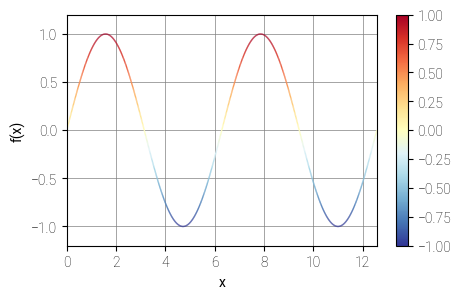

In [20]:
fig, ax = plt.subplots(figsize=(5,3))

norm = plt.Normalize(y_array.min(), y_array.max())
lc = LineCollection(segments, cmap='RdYlBu_r', norm=norm)
lc.set_array(y_array)
lc.set_linewidth(1)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax)

ax.set_xlim((0,4*np.pi))
ax.set_ylim((-1.2, 1.2))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
fig.savefig('1.svg')

## 用x值作为渲染依据

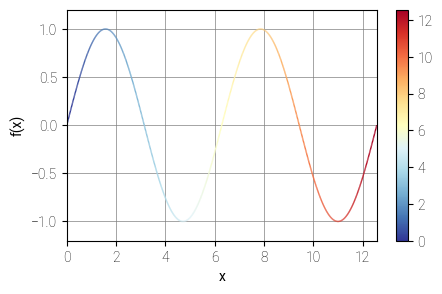

In [21]:
fig, ax = plt.subplots(figsize=(5,3))

norm = plt.Normalize(x_array.min(), x_array.max())
lc = LineCollection(segments, cmap='RdYlBu_r', norm=norm)
lc.set_array(x_array)
lc.set_linewidth(1)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax)

ax.set_xlim((0,4*np.pi))
ax.set_ylim((-1.2, 1.2))

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
fig.savefig('2.svg')

## 用切线斜率 (一阶导数) 作为渲染依据

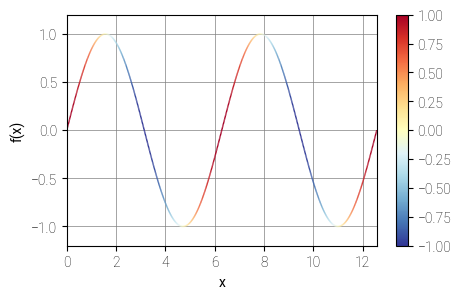

In [22]:
fig, ax = plt.subplots(figsize=(5,3))
slope_array = np.cos(x_array)

norm = plt.Normalize(slope_array.min(), slope_array.max())
lc = LineCollection(segments, cmap='RdYlBu_r', norm=norm)
lc.set_array(slope_array)
lc.set_linewidth(1)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax)

ax.set_xlim((0,4*np.pi))
ax.set_ylim((-1.2, 1.2))

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
fig.savefig('3.svg')

## 用凸凹性 (二阶导数) 作为渲染依据

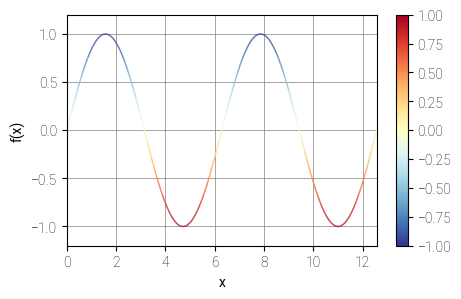

In [23]:
fig, ax = plt.subplots(figsize=(5,3))
convex_array = -np.sin(x_array)

norm = plt.Normalize(convex_array.min(), convex_array.max())
lc = LineCollection(segments, cmap='RdYlBu_r', norm=norm)
lc.set_array(convex_array)
lc.set_linewidth(1)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax)

ax.set_xlim((0,4*np.pi))
ax.set_ylim((-1.2, 1.2))

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
fig.savefig('4.svg')

参考   https://matplotlib.org/stable/gallery/lines_bars_and_markers/multicolored_line.html